In [1]:
import pandas as pd
from itertools import product

In [13]:
import tabulate

In [2]:
# get results for zero dice
all_results = []

# initializing K
k = 2
# using product() to get Combinations and repeat to get elements
combos = list(product(range(1, 7), repeat = k))

# parse combinations, taking lower result from each
dice = 0
crit = 0
success = 0
mixed = 0
fail = 0
total = 36
for combo in combos:
    if min(combo) == 6:
        success += 1
    elif min(combo) >= 4:
        mixed += 1
    else: fail +=1
percent_success = round(success / total * 100)
percent_mixed = round(mixed / total * 100)
percent_fail = round(fail / total * 100)
results = [dice, percent_fail, percent_mixed, percent_success, crit]
all_results.append(results)
all_results

[[0, 75, 22, 3, 0]]

In [3]:
# get results for non-zero dice pools

# loop through pool totals from one to seven
for i in range(7):

# initializing K
    k = i + 1
    # using product() to get Combinations and repeat to get elements
    combos = list(product(range(1, 7), repeat = k))
    
    # parse the combinations for outcomes
    dice = k
    crit = 0
    success = 0
    mixed = 0
    fail = 0
    total = 6**k
    for combo in combos:
        if combo.count(6) >= 2:
            crit += 1
        elif max(combo) == 6:
            success += 1
        elif max(combo) >= 4:
            mixed += 1
        else:
            fail += 1
    percent_crit = round(crit / total * 100)
    percent_success = round(success / total * 100)
    percent_mixed = round(mixed / total * 100)
    percent_fail = round(fail / total * 100)
    results = [dice, percent_fail, percent_mixed, percent_success, percent_crit]
    all_results.append(results)
all_results

[[0, 75, 22, 3, 0],
 [1, 50, 33, 17, 0],
 [2, 25, 44, 28, 3],
 [3, 12, 45, 35, 7],
 [4, 6, 42, 39, 13],
 [5, 3, 37, 40, 20],
 [6, 2, 32, 40, 26],
 [7, 1, 27, 39, 33]]

In [42]:
# Create a dataframe with the action roll probabilities
action_df = pd.DataFrame(all_results, columns=['Dice', 'Failure', 'Mixed', 'Success', 'Critical'])
action_df

,Dice,Failure,Mixed,Success,Critical
0,0,75,22,3,0
1,1,50,33,17,0
2,2,25,44,28,3
3,3,12,45,35,7
4,4,6,42,39,13
5,5,3,37,40,20
6,6,2,32,40,26
7,7,1,27,39,33


In [40]:
action_df_formatted = action_df
action_df_formatted['Failure'] = action_df_formatted['Failure'].map('{}%'.format)
action_df_formatted['Mixed'] = action_df_formatted['Mixed'].map('{}%'.format)
action_df_formatted['Success'] = action_df_formatted['Success'].map('{}%'.format)
action_df_formatted['Critical'] = action_df_formatted['Critical'].map('{}%'.format)
print(action_df_formatted.to_markdown(index=False))

|   Dice | Failure   | Mixed   | Success   | Critical   |
|-------:|:----------|:--------|:----------|:-----------|
|      0 | 75%       | 22%     | 3%        | 0%         |
|      1 | 50%       | 33%     | 17%       | 0%         |
|      2 | 25%       | 44%     | 28%       | 3%         |
|      3 | 12%       | 45%     | 35%       | 7%         |
|      4 | 6%        | 42%     | 39%       | 13%        |
|      5 | 3%        | 37%     | 40%       | 20%        |
|      6 | 2%        | 32%     | 40%       | 26%        |
|      7 | 1%        | 27%     | 39%       | 33%        |


In [5]:
from matplotlib import pyplot as plt

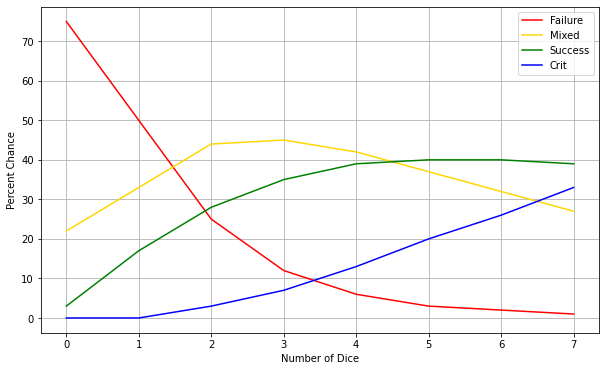

In [44]:
plt.subplots(figsize=(10, 6))
plt.plot(action_df['Dice'], action_df['Failure'], color='red')
plt.plot(action_df['Dice'], action_df['Mixed'], color='gold')
plt.plot(action_df['Dice'], action_df['Success'], color='green')
plt.plot(action_df['Dice'], action_df['Critical'], color='blue')
plt.grid(True)
plt.xlabel('Number of Dice')
plt.ylabel('Percent Chance')
plt.legend(['Failure', 'Mixed', 'Success', 'Crit'], loc='upper right')
plt.savefig('action.png')

In [7]:
# Calculate probabilities for resistance rolls

# Resistance with zero dice
# get results for zero dice
all_resist_results = []

# initializing K
k = 2
# using product() to get Combinations and repeat to get elements
combos = list(product(range(1, 7), repeat = k))

# parse combinations, taking lower result from each
dice = 0
minus5 = 0
minus4 = 0
minus3 = 0
minus2 = 0
minus1 = 0
zero = 0
plus1 = 0
total = 36

for combo in combos:
    stress = 6 - min(combo)
    if stress == 5:
        minus5 += 1
    elif stress == 4:
        minus4 += 1
    elif stress == 3:
        minus3 += 1
    elif stress == 2:
        minus2 += 1
    elif stress == 1:
        minus1 += 1
    else:
        zero += 1
percent_minus5 = round(minus5 / total * 100)
percent_minus4 = round(minus4 / total * 100)
percent_minus3 = round(minus3 / total * 100)
percent_minus2 = round(minus2 / total * 100)
percent_minus1 = round(minus1 / total * 100)
percent_zero = round(zero / total * 100)
percent_plus1 = 0       
resist_results = [dice, percent_minus5, percent_minus4, percent_minus3, percent_minus2, percent_minus1, zero, percent_plus1]
all_resist_results.append(resist_results)
all_resist_results

[[0, 31, 25, 19, 14, 8, 1, 0]]

In [8]:
# # get the results for positive dice pools
for i in range(5):

    # initializing K
    k = i + 1
    # using product() to get Combinations and repeat to get elements
    combos = list(product(range(1, 7), repeat = k))

    dice = k
    minus5 = 0
    minus4 = 0
    minus3 = 0
    minus2 = 0
    minus1 = 0
    zero = 0
    plus1 = 0
    total = 6**k

    for combo in combos:
        if combo.count(6) >=2:
            plus1 += 1
        elif 6 - max(combo) == 0:
            zero += 1
        elif 6 - max(combo) == 1:
            minus1 += 1
        elif 6 - max(combo) == 2:
            minus2 += 1
        elif 6 - max(combo) == 3:
            minus3 += 1
        elif 6 - max(combo) == 4:
            minus4 += 1
        elif 6 - max(combo) == 5:
            minus5 += 1

    percent_minus5 = round(minus5 / total * 100)
    percent_minus4 = round(minus4 / total * 100)
    percent_minus3 = round(minus3 / total * 100)
    percent_minus2 = round(minus2 / total * 100)
    percent_minus1 = round(minus1 / total * 100)
    percent_zero = round(zero / total * 100)
    percent_plus1 = round(plus1 / total * 100)
    resist_results = [dice, percent_minus5, percent_minus4, percent_minus3, percent_minus2, percent_minus1, percent_zero, percent_plus1]
    all_resist_results.append(resist_results)
all_resist_results

[[0, 31, 25, 19, 14, 8, 1, 0],
 [1, 17, 17, 17, 17, 17, 17, 0],
 [2, 3, 8, 14, 19, 25, 28, 3],
 [3, 0, 3, 9, 17, 28, 35, 7],
 [4, 0, 1, 5, 14, 28, 39, 13],
 [5, 0, 0, 3, 10, 27, 40, 20]]

In [35]:
resist_df = pd.DataFrame(all_resist_results, columns=['Dice', '5', '4', '3', '2', '1', '0', '-1'])
resist_df

,Dice,5,4,3,2,1,0,-1
0,0,31,25,19,14,8,1,0
1,1,17,17,17,17,17,17,0
2,2,3,8,14,19,25,28,3
3,3,0,3,9,17,28,35,7
4,4,0,1,5,14,28,39,13
5,5,0,0,3,10,27,40,20


In [38]:
resist_df = resist_df_formatted
resist_df_formatted['5'] = resist_df['5'].map('{}%'.format)
resist_df_formatted['4'] = resist_df['4'].map('{}%'.format)
resist_df_formatted['3'] = resist_df['3'].map('{}%'.format)
resist_df_formatted['2'] = resist_df['2'].map('{}%'.format)
resist_df_formatted['1'] = resist_df['1'].map('{}%'.format)
resist_df_formatted['0'] = resist_df['0'].map('{}%'.format)
resist_df_formatted['-1'] = resist_df['-1'].map('{}%'.format)
print(resist_df_formatted.to_markdown(index=False))

|   Dice | 5   | 4   | 3   | 2   | 1   | 0   | -1   |
|-------:|:----|:----|:----|:----|:----|:----|:-----|
|      0 | 31% | 25% | 19% | 14% | 8%  | 1%  | 0%   |
|      1 | 17% | 17% | 17% | 17% | 17% | 17% | 0%   |
|      2 | 3%  | 8%  | 14% | 19% | 25% | 28% | 3%   |
|      3 | 0%  | 3%  | 9%  | 17% | 28% | 35% | 7%   |
|      4 | 0%  | 1%  | 5%  | 14% | 28% | 39% | 13%  |
|      5 | 0%  | 0%  | 3%  | 10% | 27% | 40% | 20%  |


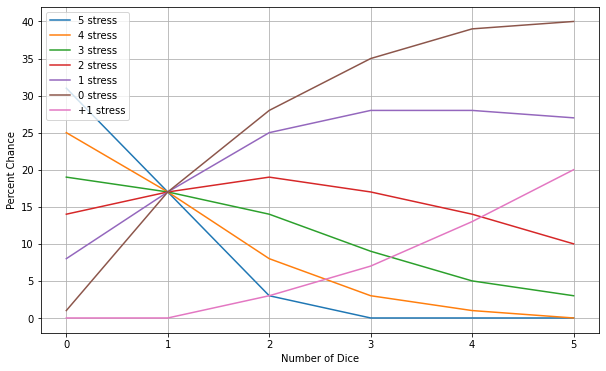

In [11]:
plt.subplots(figsize=(10, 6))
plt.plot(resist_df.Dice, resist_df['5'])
plt.plot(resist_df.Dice, resist_df['4'])
plt.plot(resist_df.Dice, resist_df['3'])
plt.plot(resist_df.Dice, resist_df['2'])
plt.plot(resist_df.Dice, resist_df['1'])
plt.plot(resist_df.Dice, resist_df['0'])
plt.plot(resist_df.Dice, resist_df['-1'])
plt.grid(True)
plt.xlabel('Number of Dice')
plt.ylabel('Percent Chance')
plt.legend(['5 stress', '4 stress', '3 stress', '2 stress', '1 stress', '0 stress', '+1 stress'], loc='upper left')
plt.show()

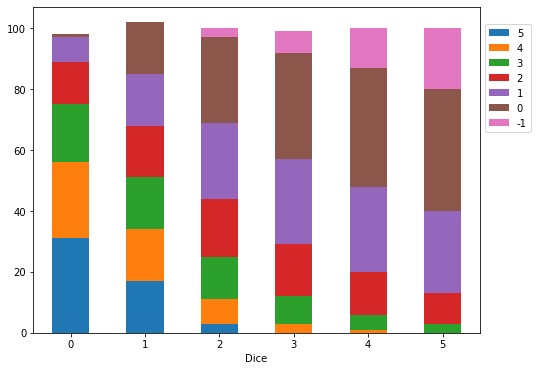

In [12]:
resist_df.plot(x='Dice', kind='bar', stacked=True, figsize=(8, 6))
plt.xticks(rotation=360)
plt.gca().legend(loc='lower left', bbox_to_anchor=(1, 0.6))
plt.savefig('resist.png')